In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from time import time
import os
import glob

In [ ]:
dataset = pd.read_csv(r'/content/drive/MyDrive/NBaIotDS/BinaryDS/BinaryDataset_Shuffled.csv', index_col=0)

In [ ]:
dataset.head()

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,label
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
3371755,86.401886,515.053393,23182.513099,160.591634,474.190542,38018.559772,566.821013,436.280365,48726.669652,6344.228091,...,0.000000e+00,0.0,1.000000,566.000000,0.000000,566.000000,0.000000e+00,0.000000e+00,0.0,1
1639058,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,...,0.000000e+00,0.0,1.000000,60.000000,0.000000,60.000000,0.000000e+00,0.000000e+00,0.0,1
416349,1.000418,428.864364,45.627248,1.012073,425.262124,1209.585007,1.360886,349.284587,18859.159960,3.713337,...,0.000000e+00,0.0,13.978761,454.378103,19.926698,454.378103,3.970733e+02,0.000000e+00,0.0,0
722657,126.206297,416.605717,48355.528380,195.345904,428.072426,45779.469713,567.149103,427.353051,46095.012719,5670.737868,...,0.000000e+00,0.0,29719.298956,554.000000,0.000008,554.000000,5.820766e-11,0.000000e+00,0.0,1
281502,1.000000,60.000000,0.000005,1.000030,60.000390,0.005066,1.031064,60.391669,4.938302,3.037198,...,-1.790000e-30,0.0,6.461866,60.000000,0.000000,84.852814,1.820000e-12,-1.550000e-29,0.0,0


In [ ]:
X, y = dataset.iloc[:, :-1], dataset.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, shuffle=True)

In [ ]:
my_model = xgb.XGBClassifier()
t0= time()
my_model.fit(X_train, y_train)
print(time()- t0)
t1= time()
y_pred = my_model.predict(X_test)
print(time()- t1)

480.417115688324
0.6938972473144531


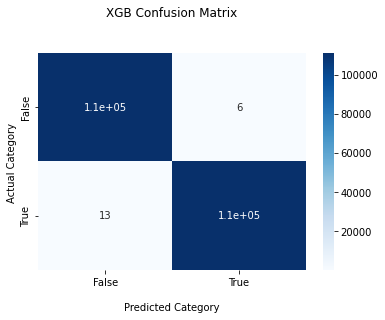

In [ ]:
cf_matrix_XGB = confusion_matrix(y_test, y_pred)
# XGB plot
ax = sns.heatmap(cf_matrix_XGB, annot=True, cmap='Blues')

ax.set_title('XGB Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Category')
ax.set_ylabel('Actual Category ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
XGB_Accuracy = accuracy_score(y_test, y_pred)
print('XGB Performance Evaluation Results:')
XGB_Precision = precision_score(y_test, y_pred, average = None)
XGB_F1 = f1_score (y_test, y_pred, average = None)
XGB_Recall = recall_score(y_test, y_pred, average = None)
print('(XGB_Accuracy, XGB_Precision,  XGB_Recall, XGB_F1)')
XGB_Accuracy, XGB_Precision,  XGB_Recall, XGB_F1

XGB Performance Evaluation Results:
(XGB_Accuracy, XGB_Precision,  XGB_Recall, XGB_F1)


(0.9999145579724157,
 array([0.99988326, 0.99994595]),
 array([0.99994612, 0.9998829 ]),
 array([0.99991469, 0.99991443]))

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
my_model = AdaBoostClassifier()
t0= time()
my_model.fit(X_train, y_train)
print(time()- t0)
t1= time()
y_pred = my_model.predict(X_test)
print(time()- t1)

504.89096450805664
3.623037815093994


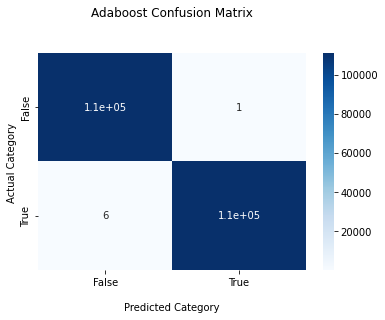

In [ ]:
cf_matrix_ADA = confusion_matrix(y_test, y_pred)
# Adaboost plot
ax = sns.heatmap(cf_matrix_ADA, annot=True, cmap='Blues')

ax.set_title('Adaboost Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Category')
ax.set_ylabel('Actual Category ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
ADA_Accuracy = accuracy_score(y_test, y_pred)
print('Adaboost Performance Evaluation Results:')
ADA_Precision = precision_score(y_test, y_pred, average = None)
ADA_F1 = f1_score (y_test, y_pred, average = None)
ADA_Recall = recall_score(y_test, y_pred, average = None)
print('(ADA_Accuracy, ADA_Precision, ADA_Recall, ADA_F1)')
ADA_Accuracy, ADA_Precision, ADA_Recall, ADA_F1

Adaboost Performance Evaluation Results:
(ADA_Accuracy, ADA_Precision, ADA_Recall, ADA_F1)


(0.9999685213582584,
 array([0.99994612, 0.99999099]),
 array([0.99999102, 0.99994596]),
 array([0.99996857, 0.99996847]))

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
GB_model = GradientBoostingClassifier(random_state = 0)
t0= time()
GB_model.fit(X_train, y_train)
print(time()- t0)
t1= time()
y_pred = GB_model.predict(X_test)
print(time()- t1)

2307.515308856964
0.9590883255004883


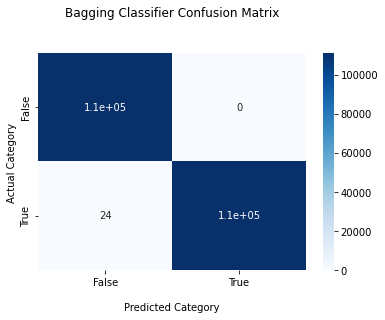

In [ ]:
cf_matrix_GB= confusion_matrix(y_test, y_pred)
# Bagging Classifier plot
ax = sns.heatmap(cf_matrix_GB, annot=True, cmap='Blues')

ax.set_title('Bagging Classifier Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Category')
ax.set_ylabel('Actual Category ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
GB_Accuracy = accuracy_score(y_test, y_pred)
print('Gradient Boosting Classifier Performance Evaluation Results:')
GB_F1 = f1_score (y_test, y_pred, average = None)
GB_Recall = recall_score(y_test, y_pred, average = None)
GB_Precision = precision_score(y_test, y_pred, average = None)
print('(GB_Accuracy, GB_Precision, GB_Recall, GB_F1')
GB_Accuracy, GB_Precision, GB_Recall, GB_F1

Gradient Boosting Classifier Performance Evaluation Results:
(GB_Accuracy, GB_Precision, GB_Recall, GB_F1


(0.9998920732283146,
 array([0.99978452, 1.        ]),
 array([1.        , 0.99978382]),
 array([0.99989225, 0.9998919 ]))

In [ ]:
from lightgbm import LGBMClassifier
LGB_model = LGBMClassifier(random_state = 0)
t0= time()
LGB_model.fit(X_train, y_train)
print(time()- t0)
t1= time()
y_pred = LGB_model.predict(X_test)
print(time()- t1)

43.027215242385864
0.7082149982452393


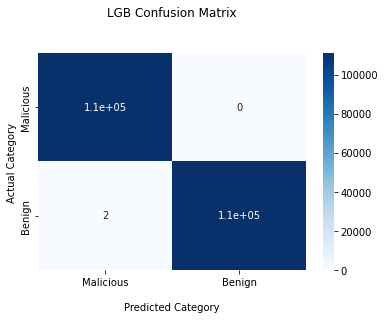

In [ ]:
cf_matrix_LGB = confusion_matrix(y_test, y_pred)
# LGB plot
ax = sns.heatmap(cf_matrix_LGB, annot=True, cmap='Blues')

ax.set_title('LGB Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Category')
ax.set_ylabel('Actual Category ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Malicious','Benign'])
ax.yaxis.set_ticklabels(['Malicious','Benign'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
LGB_Accuracy = accuracy_score(y_test, y_pred)
print('Light Gradient Boosting Classifier Performance Evaluation Results:')
LGB_F1 = f1_score (y_test, y_pred, average = None)
LGB_Recall = recall_score(y_test, y_pred, average = None)
LGB_Precision = precision_score(y_test, y_pred, average = None)
print('(LGB_Accuracy, LGB_Precision, LGB_Recall, LGB_F1')
LGB_Accuracy, LGB_Precision, LGB_Recall, LGB_F1

Light Gradient Boosting Classifier Performance Evaluation Results:
(LGB_Accuracy, LGB_Precision, LGB_Recall, LGB_F1


(0.9999910061023596,
 array([0.99998204, 1.        ]),
 array([1.        , 0.99998199]),
 array([0.99999102, 0.99999099]))

In [ ]:
pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 14.8 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier
CAB_model = CatBoostClassifier(random_state = 0)
t0= time()
CAB_model.fit(X_train, y_train)
print(time()- t0)
t1= time()
y_pred = CAB_model.predict(X_test)
print(time()- t1)

Learning rate set to 0.187162
0:	learn: 0.2372445	total: 497ms	remaining: 8m 16s
1:	learn: 0.0767570	total: 963ms	remaining: 8m
2:	learn: 0.0259575	total: 1.46s	remaining: 8m 6s
3:	learn: 0.0114311	total: 1.94s	remaining: 8m 4s
4:	learn: 0.0056045	total: 2.41s	remaining: 8m
5:	learn: 0.0037508	total: 2.82s	remaining: 7m 47s
6:	learn: 0.0027460	total: 3.23s	remaining: 7m 37s
7:	learn: 0.0022373	total: 3.6s	remaining: 7m 26s
8:	learn: 0.0017779	total: 3.98s	remaining: 7m 18s
9:	learn: 0.0015897	total: 4.35s	remaining: 7m 10s
10:	learn: 0.0014476	total: 4.74s	remaining: 7m 5s
11:	learn: 0.0014050	total: 5.14s	remaining: 7m 3s
12:	learn: 0.0011731	total: 5.85s	remaining: 7m 24s
13:	learn: 0.0010808	total: 6.39s	remaining: 7m 30s
14:	learn: 0.0009844	total: 6.77s	remaining: 7m 24s
15:	learn: 0.0008681	total: 7.15s	remaining: 7m 19s
16:	learn: 0.0007745	total: 7.51s	remaining: 7m 14s
17:	learn: 0.0007409	total: 7.83s	remaining: 7m 7s
18:	learn: 0.0006708	total: 8.21s	remaining: 7m 3s
19:	lea

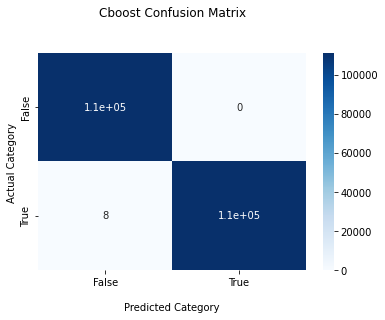

In [ ]:
cf_matrix_Cboost = confusion_matrix(y_test, y_pred)
# CATB plot
ax = sns.heatmap(cf_matrix_Cboost, annot=True, cmap='Blues')

ax.set_title('Cboost Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Category')
ax.set_ylabel('Actual Category ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
CAB_Accuracy = accuracy_score(y_test, y_pred)
print('Cat Boosting Classifier Performance Evaluation Results:')
CAB_F1 = f1_score (y_test, y_pred, average = None)
CAB_Recall = recall_score(y_test, y_pred, average = None)
CAB_Precision = precision_score(y_test, y_pred, average = None)
print('(CAB_Accuracy, CAB_Precision, CAB_Recall, CAB_F1')
CAB_Accuracy, CAB_Precision, CAB_Recall, CAB_F1

Cat Boosting Classifier Performance Evaluation Results:
(CAB_Accuracy, CAB_Precision, CAB_Recall, CAB_F1


(0.9999640244094382,
 array([0.99992816, 1.        ]),
 array([1.        , 0.99992794]),
 array([0.99996408, 0.99996397]))

In [ ]:
from sklearn.ensemble import HistGradientBoostingClassifier
HGB_model = HistGradientBoostingClassifier(random_state = 0)
t0= time()
HGB_model.fit(X_train, y_train)
print(time()- t0)
t1= time()
y_pred = HGB_model.predict(X_test)
print(time()- t1)

47.739142417907715
1.261211633682251


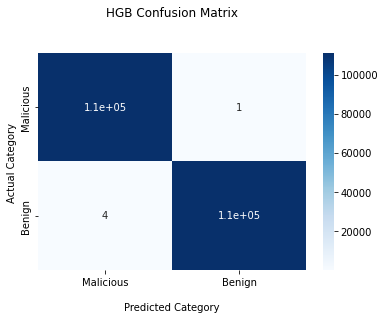

In [ ]:
cf_matrix_HGB = confusion_matrix(y_test, y_pred)
# HGB plot
ax = sns.heatmap(cf_matrix_HGB, annot=True, cmap='Blues')

ax.set_title('HGB Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Category')
ax.set_ylabel('Actual Category ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Malicious','Benign'])
ax.yaxis.set_ticklabels(['Malicious','Benign'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
HGB_Accuracy = accuracy_score(y_test, y_pred)
print('Histo Gradient Boosting Classifier Performance Evaluation Results:')
HGB_F1 = f1_score (y_test, y_pred, average = None)
HGB_Recall = recall_score(y_test, y_pred, average = None)
HGB_Precision = precision_score(y_test, y_pred, average = None)
print('(HGB_Accuracy, HGB_Precision, HGB_Recall, HGB_F1')
HGB_Accuracy, HGB_Precision, HGB_Recall, HGB_F1

Histo Gradient Boosting Classifier Performance Evaluation Results:
(HGB_Accuracy, HGB_Precision, HGB_Recall, HGB_F1


(0.9999775152558988,
 array([0.99996408, 0.99999099]),
 array([0.99999102, 0.99996397]),
 array([0.99997755, 0.99997748]))